In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

In [209]:
df=pd.read_csv("C:/Users/Gaurav Singh/Desktop/python/Assignment no 4/car_price.csv")

In [3]:
df.head(5)

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.columns

Index(['symboling', 'normalized_losses', 'Fuel_type', 'make', 'num_of_doors',
       'aspiration', 'wheel_base', 'engine_location', 'drive_wheels',
       'body_style', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [210]:
df.drop(['symboling', 'normalized_losses', 'Fuel_type', 'make', 'num_of_doors',
       'aspiration', 'wheel_base', 'engine_location', 'drive_wheels',
       'body_style', 'curb_weight', 'engine_type','num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'peak_rpm', 'city_mpg',
       'highway_mpg'],axis=1,inplace=True)

In [211]:
df.dropna()
df.head(5)
df=pd.DataFrame(df)
print(df.dtypes)

length        float64
width         float64
height        float64
horsepower     object
price          object
dtype: object


In [212]:
df = df[df['price'].apply(lambda x: x.isnumeric())]
df['price'] = df['price'].astype(float)

In [223]:
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')
df=df.dropna()
print(df.dtypes)

length        float64
width         float64
height        float64
horsepower    float64
price         float64
dtype: object


Text(0.5, 1.0, 'horsepower')

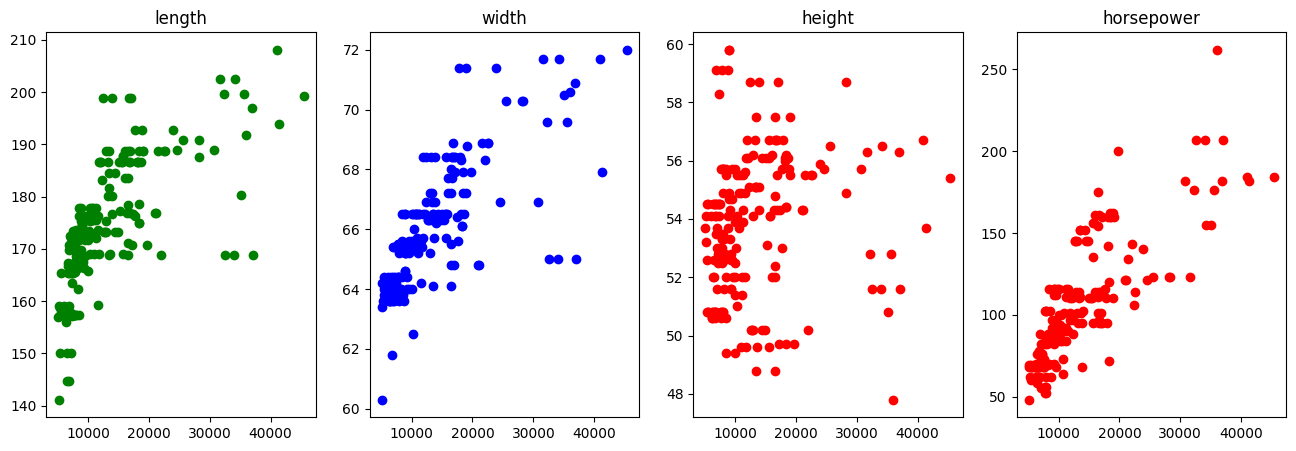

In [224]:
fig, axes=plt.subplots(1,4,figsize=(16,5))
axes[0].scatter(df.price,df.length,color='green')
axes[0].set_title('length')
axes[1].scatter(df.price,df.width,color='blue')
axes[1].set_title('width')
axes[2].scatter(df.price,df.height,color='red')
axes[2].set_title('height')
axes[3].scatter(df.price,df.horsepower,color='red')
axes[3].set_title('horsepower')

In [20]:
from sklearn import linear_model

In [225]:
indep=df.drop(['price'],axis=1,inplace=False)

In [220]:
from sklearn.model_selection import train_test_split

In [226]:
X_train,X_test,Y_train,Y_test=train_test_split(indep,df.price,test_size=0.2)

In [227]:
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [228]:
Y_pred=reg.predict(X_test)

In [229]:
from sklearn.metrics import r2_score

In [230]:
print(r2_score(Y_test,Y_pred))

0.7175390333055982


Text(0.5, 0, 'horsepower')

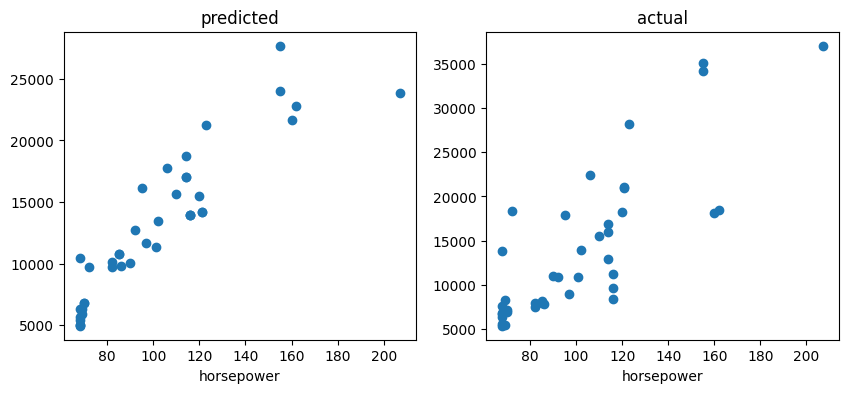

In [256]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(X_test['horsepower'],Y_pred)
ax[0].set_title('predicted')
ax[1].scatter(X_test['horsepower'],Y_test)
ax[1].set_title('actual')
ax[0].set_xlabel('horsepower')
ax[1].set_xlabel('horsepower')